# Gender Recognition by Voice

## Importing Data

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv('data/cleaned/voice_data.csv')
X_train = pd.read_csv('data/cleaned/X_train.csv')
y_train = pd.read_csv('data/cleaned/y_train.csv')
X_test = pd.read_csv('data/cleaned/X_test.csv')
y_test = pd.read_csv('data/cleaned/y_test.csv')

In [42]:
data.head()

,meanfreq,median,Q25,Q75,IQR,sd,log_skew,log_kurt,sp.ent,sfm,mode,meanfun,log_minfun,exp_maxfun,modindx,meandom,mindom,maxdom,dfrange,label
0,0.059781,0.032027,0.015071,0.090193,0.075122,0.064241,2.629257,5.618235,0.893369,0.491918,0.000000,0.084279,-4.153988,15.778065,0.000000,0.007812,0.007812,0.007812,0.000000,male
1,0.066009,0.040229,0.019414,0.092666,0.073252,0.067310,3.153731,6.454591,0.892193,0.513724,0.000000,0.107937,-4.146106,12.182494,0.052632,0.009014,0.007812,0.054688,0.046875,male
2,0.077316,0.036718,0.008701,0.131908,0.123207,0.083829,3.458118,6.933353,0.846389,0.478905,0.000000,0.098706,-4.156928,15.057322,0.046512,0.007990,0.007812,0.015625,0.007812,male
3,0.151228,0.158011,0.096582,0.207955,0.111374,0.072111,0.803270,1.644283,0.963322,0.727232,0.083878,0.088965,-4.028694,12.182494,0.247119,0.201497,0.007812,0.562500,0.554688,male
4,0.135120,0.124656,0.078720,0.206045,0.127325,0.079146,0.742496,1.674048,0.971955,0.783568,0.104261,0.106398,-4.078596,14.391916,0.208274,0.712812,0.007812,5.484375,5.476562,male


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meanfreq    3168 non-null   float64
 1   median      3168 non-null   float64
 2   Q25         3168 non-null   float64
 3   Q75         3168 non-null   float64
 4   IQR         3168 non-null   float64
 5   sd          3168 non-null   float64
 6   log_skew    3168 non-null   float64
 7   log_kurt    3168 non-null   float64
 8   sp.ent      3168 non-null   float64
 9   sfm         3168 non-null   float64
 10  mode        3168 non-null   float64
 11  meanfun     3168 non-null   float64
 12  log_minfun  3168 non-null   float64
 13  exp_maxfun  3168 non-null   float64
 14  modindx     3168 non-null   float64
 15  meandom     3168 non-null   float64
 16  mindom      3168 non-null   float64
 17  maxdom      3168 non-null   float64
 18  dfrange     3168 non-null   float64
 19  label       3168 non-null  

The meaning of the features are as follows:

* `meanfreq`: mean frequency (in kHz)
* `median`: median frequency (in kHz)
* `Q25`: first quantile (in kHz)
* `Q75`: third quantile (in kHz)
* `IQR`: inter-quantile range (in kHz)
* `sd`: standard deviation of frequency
* `log_skew`: skewness after logarithmic transformation
* `log_kurt`: kurtosis after logarithmic transformation
* `sp.ent`: spectral entropy
* `sfm`: spectral flatness
* `mode`: mode frequency
* `log_meanfun`: average of fundamental frequency measured across acoustic signal
* `log_minfun`: minimum fundamental frequency measured across acoustic signal after logarithmic transformation
* `exp_maxfun`: maximum fundamental frequency measured across acoustic signal after exponential transformation
* `modindx`: modulation index
* `meandom`: average of dominant frequency measured across acoustic signal
* `mindom`: minimum of dominant frequency measured across acoustic signal
* `maxdom`: maximum of dominant frequency measured across acoustic signal
* `dfrange`: range of dominant frequency measured across acoustic signal
* `label`: male or female

## Baseline Model: Classification Tree

In the lecture, we have seen that a classification tree is a good model to start with. We will use the same model here.

We try to use a classification tree with depth 4.

### Training the Model

We will use the `DecisionTreeClassifier` from `sklearn.tree` to train a classification tree. We will use the default parameters for now.


In [44]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

### Evaluating the Model

Firstly, we will use the `score` method to see the accuracy of the model on the training set.

In [45]:
print("Training set accuracy: {:.2f}".format(tree.score(X_train, y_train)))

Training set accuracy: 0.98


Then we will use the `score` method to see the accuracy of the model on the test set.

In [46]:
print("Test set accuracy: {:.2f}".format(tree.score(X_test, y_test)))

Test set accuracy: 0.96


We try to see the confusion matrix of the model.

<Axes: >

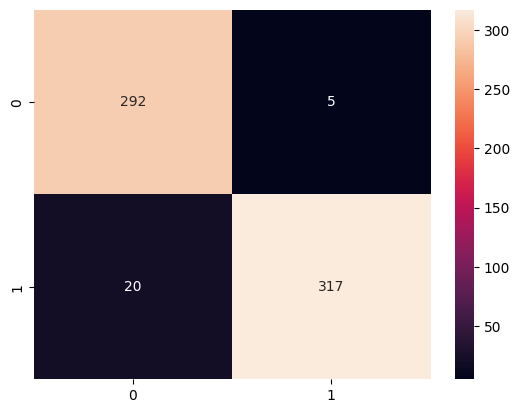

In [47]:
from sklearn.metrics import confusion_matrix

y_prediction = tree.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, fmt="d")

In [50]:
TN, FP, FN, TP = confusion_matrix(y_test, y_prediction).ravel()
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
print("True Positive Rate: {:.2f}".format(TPR))
print("True Negative Rate: {:.2f}".format(TNR))
print("False Positive Rate: {:.2f}".format(FPR))
print("False Negative Rate: {:.2f}".format(FNR))

True Positive Rate: 0.94
True Negative Rate: 0.98
False Positive Rate: 0.02
False Negative Rate: 0.06


### Visualizing and Analyzing the Model

Then we try to draw the tree using `sklearn.tree.plot_tree`.

[Text(0.5446428571428571, 0.9, 'meanfun <= 0.139\ngini = 0.5\nsamples = 2534\nvalue = [1287, 1247]\nclass = l'),
 Text(0.2857142857142857, 0.7, 'IQR <= 0.071\ngini = 0.082\nsamples = 1242\nvalue = [53, 1189]\nclass = a'),
 Text(0.14285714285714285, 0.5, 'meanfun <= 0.13\ngini = 0.478\nsamples = 53\nvalue = [32, 21]\nclass = l'),
 Text(0.07142857142857142, 0.3, 'sfm <= 0.477\ngini = 0.464\nsamples = 30\nvalue = [11, 19]\nclass = a'),
 Text(0.03571428571428571, 0.1, 'gini = 0.172\nsamples = 21\nvalue = [2, 19]\nclass = a'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = l'),
 Text(0.21428571428571427, 0.3, 'sfm <= 0.207\ngini = 0.159\nsamples = 23\nvalue = [21, 2]\nclass = l'),
 Text(0.17857142857142858, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = l'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]\nclass = l'),
 Text(0.42857142857142855, 0.5, 'meanfun <= 0.134\ngini = 0.035\nsamples = 1189\nvalue = [21, 1168]\nclass = a'),
 Te

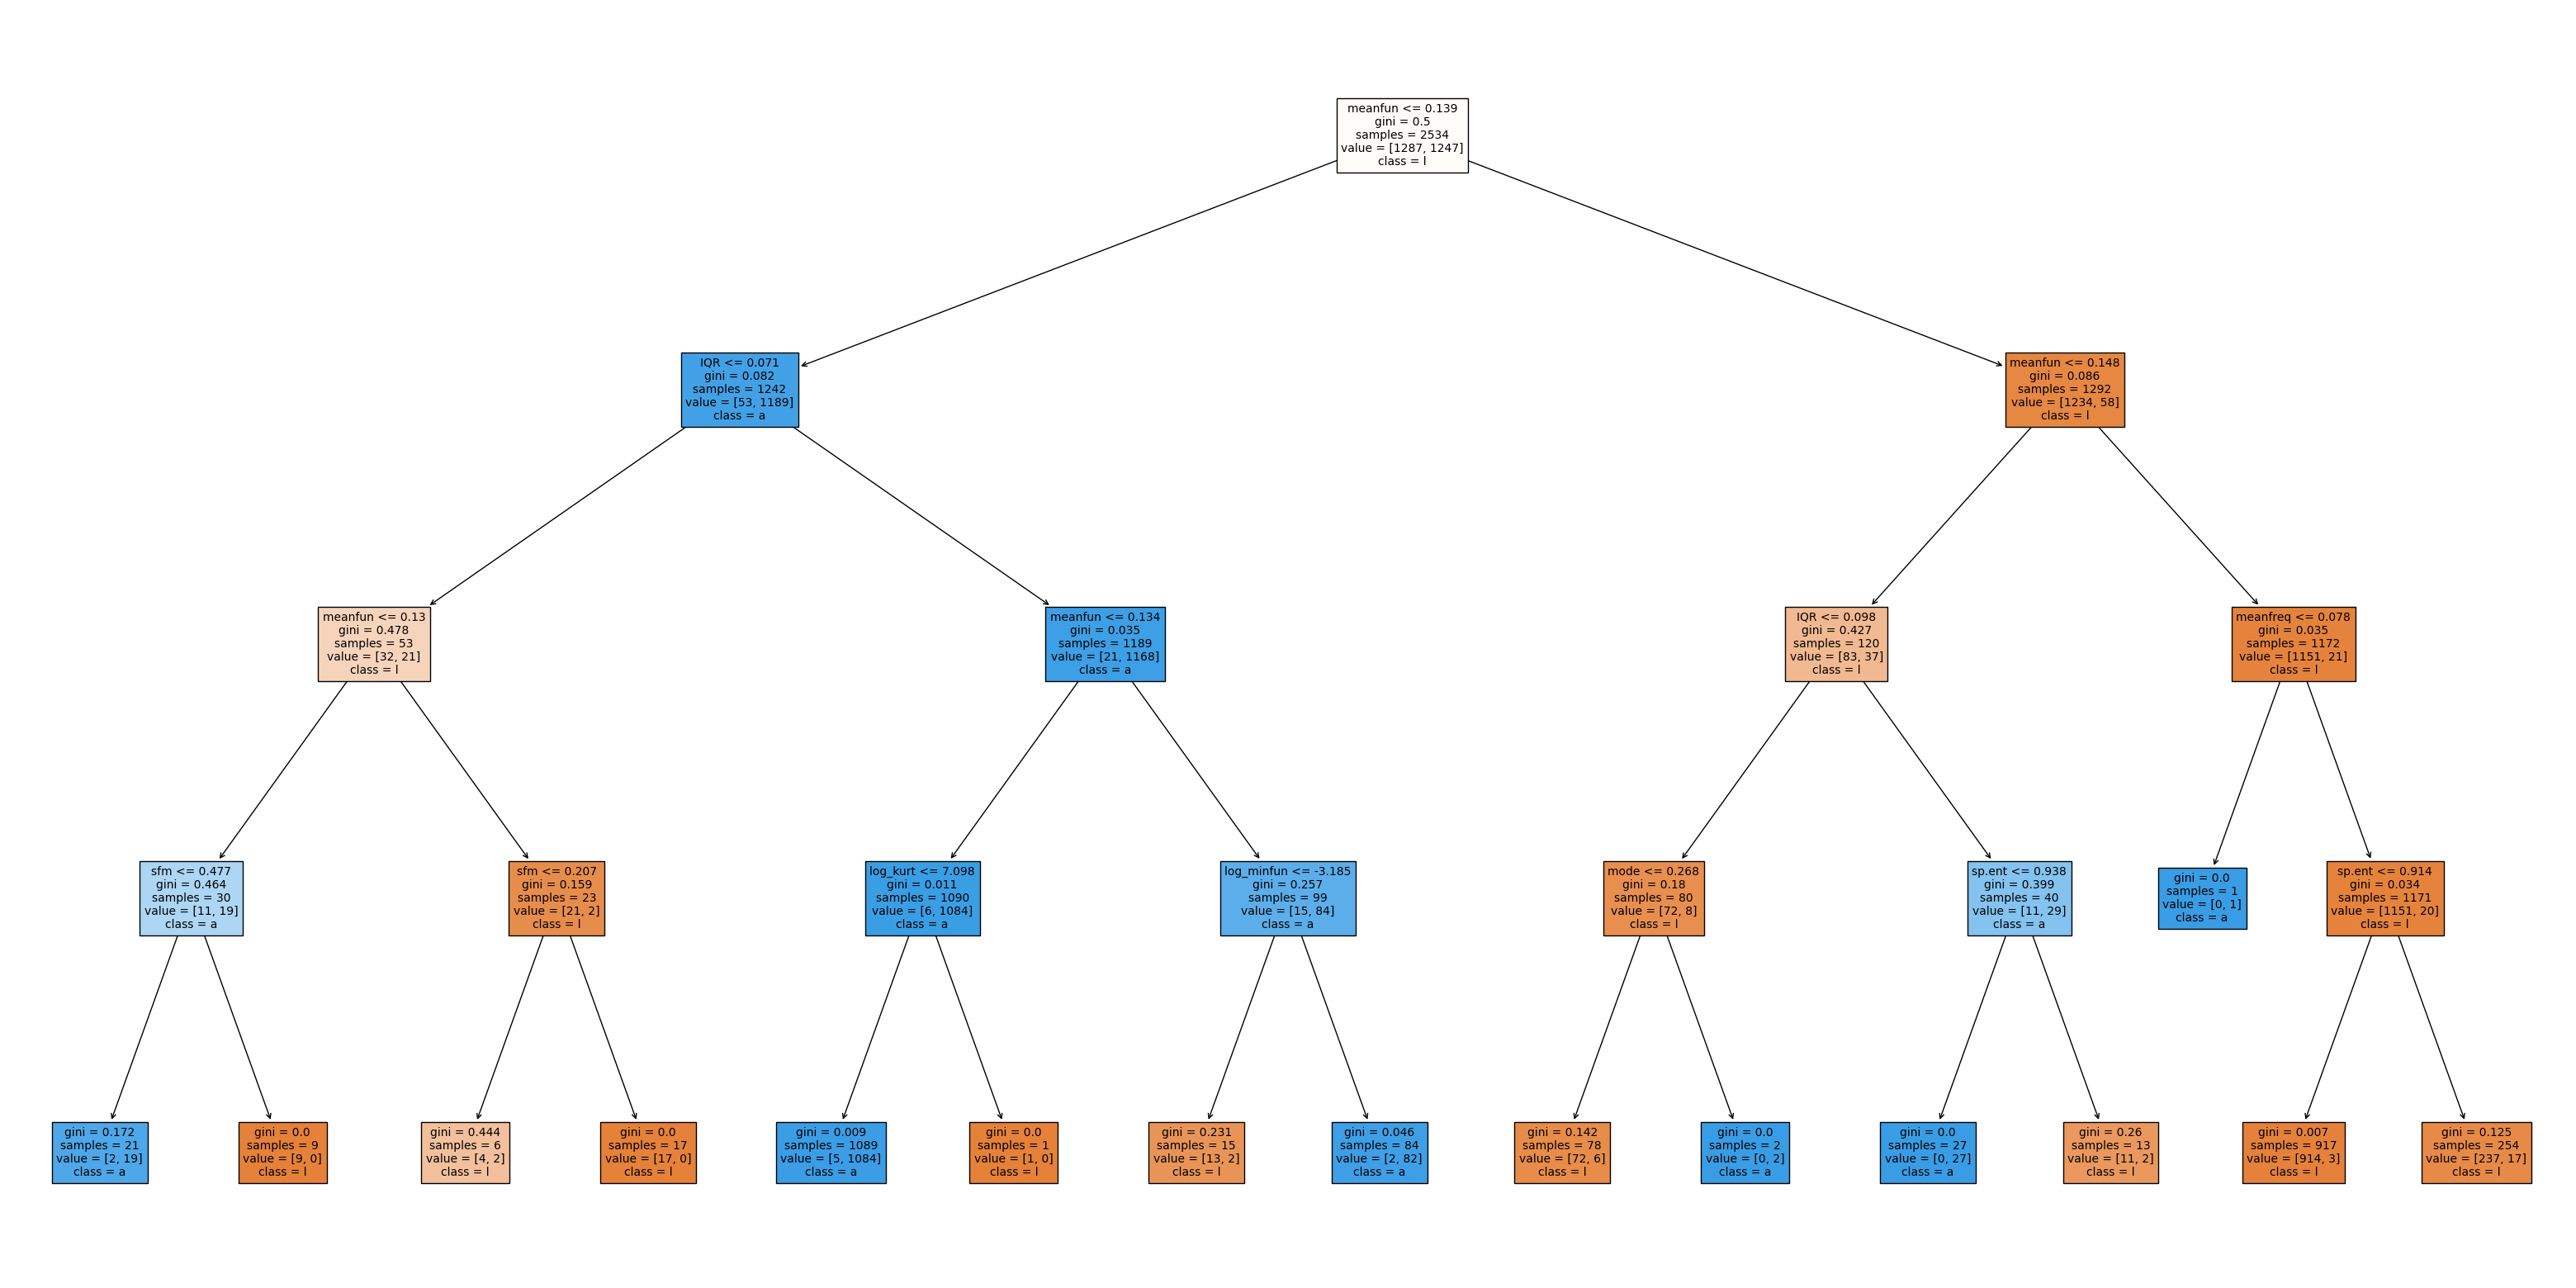

In [48]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 20))
plot_tree(tree, class_names="label", feature_names=X_train.columns, filled=True, fontsize=10)

From the tree, we can see that the most important feature is `meanfun`. The second most important feature is `IQR`.